In [32]:
import pandas as pd
df = pd.read_csv('Dataset/Housing.csv')
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [33]:
print(df.isnull().sum())
df.fillna(df.select_dtypes(include = 'number').mean(), inplace = True)
print(df.head())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2            

In [34]:
def yes_or_no(value):
    return 1 if value == "yes" else 0
df['mainroad'] = df['mainroad'].apply(yes_or_no)
df['guestroom'] = df['guestroom'].apply(yes_or_no)
df['basement'] = df['basement'].apply(yes_or_no)
df['hotwaterheating'] = df['hotwaterheating'].apply(yes_or_no)
df['airconditioning'] = df['airconditioning'].apply(yes_or_no)
df['prefarea'] = df['prefarea'].apply(yes_or_no)
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished  


In [35]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['furnishingstatus'] = lb.fit_transform(df['furnishingstatus'])

In [36]:
Q1 = df['price'].quantile(0.25) 
Q3 = df['price'].quantile(0.75)  
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print(f"Dataset after removing outliers: {df.shape}")

Dataset after removing outliers: (530, 13)


In [37]:
import numpy as np
df['price'] = np.log(df['price'])

In [38]:
x = df.drop(columns=['price'])
y = df['price']

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
print(x_scaled)

[[ 0.45260931  1.44774876 -0.56125391 ...  1.58553209 -0.53517078
  -0.10686042]
 [ 0.74197643  1.44774876  1.59428648 ...  0.39862248  1.86856239
   1.21025636]
 [ 1.65830564  0.07755797  1.59428648 ...  1.58553209 -0.53517078
  -1.42397719]
 ...
 [-0.69521361 -1.29263282 -0.56125391 ... -0.78828714 -0.53517078
   1.21025636]
 [-1.03763137  0.07755797 -0.56125391 ... -0.78828714 -0.53517078
  -1.42397719]
 [-0.58428954  0.07755797 -0.56125391 ... -0.78828714 -0.53517078
   1.21025636]]


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.060323840314898
Mean Absolute Error: 0.18327868974251477
R2 Score: 0.6436952709815855


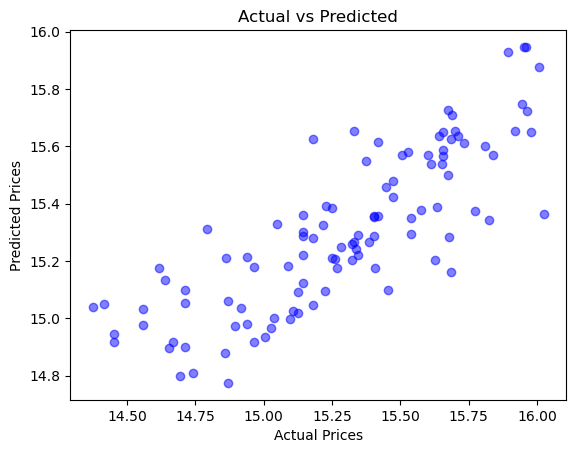

In [43]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, color='blue', alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted')
plt.show()

In [44]:
print("\nActual vs Predicted Prices:")
for actual, predicted in zip(y_test.values[:10], y_predict[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}")


Actual vs Predicted Prices:
Actual: 15.525698373498518, Predicted: 15.581048909803966
Actual: 15.048070819142122, Predicted: 15.32824627508689
Actual: 15.976532086636533, Predicted: 15.650501180408614
Actual: 15.14523456759577, Predicted: 15.123806474910028
Actual: 15.181602211766645, Predicted: 15.281271633540145
Actual: 15.65606019136176, Predicted: 15.588282247152254
Actual: 15.338300663672703, Predicted: 15.240556666877229
Actual: 14.739769459487606, Predicted: 14.809624174712809
Actual: 14.452087387035824, Predicted: 14.917144045526461
Actual: 15.610597817285004, Predicted: 15.538471698519842


In [45]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, x_scaled, y, cv=5, scoring='r2')
print(f"Cross-Validated R2 Score: {cv_scores.mean() * 100:.2f}%")

Cross-Validated R2 Score: -791.73%


In [47]:
print(f"Model Accuracy (R2 Score): {r2 * 100:.2f}%")

Model Accuracy (R2 Score): 64.37%


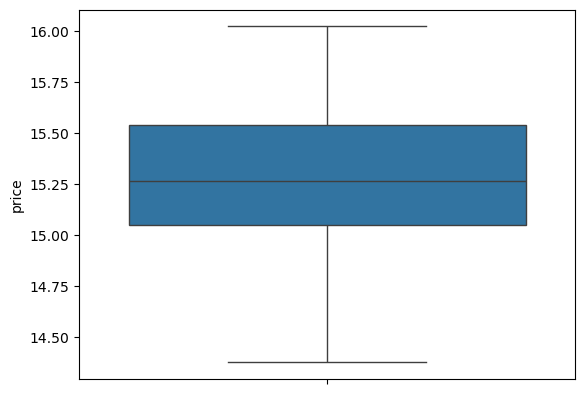

In [48]:
import seaborn as sns
sns.boxplot(df['price'])
plt.show()

In [51]:
original_price = np.exp(df['price'])
print(original_price)  

15     9100000.0
16     9100000.0
17     8960000.0
18     8890000.0
19     8855000.0
         ...    
540    1820000.0
541    1767150.0
542    1750000.0
543    1750000.0
544    1750000.0
Name: price, Length: 530, dtype: float64
